# What is this project about?

I recently started a Coursera course on Python Visualizations. I wanted to test my skills out. I really liked the visualizations that Spotify had created to summarize our listening history. Inspired by that, I decided to brush up on my Matplotlib and Seaborn skills. I hope you find this useful.

I based these visualizations off a [dataset](https://www.kaggle.com/zaheenhamidani/ultimate-spotify-tracks-db/data) I found on Kaggle. It was available as a CSV file.  

In [364]:
import pandas as pd
import matplotlib.pyplot as plt

In [365]:
import numpy as np

In [366]:
tracks = pd.read_csv('SpotifyFeatures.csv')

In [367]:
tracks['genre'].value_counts()

Comedy              9681
Soundtrack          9646
Indie               9543
Jazz                9441
Pop                 9386
Electronic          9377
Children’s Music    9353
Folk                9299
Hip-Hop             9295
Rock                9272
Alternative         9263
Classical           9256
Rap                 9232
World               9096
Soul                9089
Blues               9023
R&B                 8992
Anime               8936
Reggaeton           8927
Ska                 8874
Reggae              8771
Dance               8701
Country             8664
Opera               8280
Movie               7806
Children's Music    5403
A Capella            119
Name: genre, dtype: int64

Here, it has to be noted that there's two records of Children's Music available, so we keep the larger one since it's inclusive of all the records. 

In [368]:
tracks = tracks[tracks['genre']!="Children's Music"]

# What are the most popular genres from the dataset?

First, we get a list of all unique genres of the songs.

In [369]:
genres = tracks['genre'].unique()

Then we iterate through the genres, find the count of songs belong to each genre, and them store in a dictionary.Then we calculate the average popularity of songs in each decade using the numpy ```mean``` function and store it into a dictionary

In [370]:
pops = {}
for genre in genres:
    pops[genre] = np.mean(tracks[tracks['genre']==genre]['popularity'])

This dictionary is converted into dataframe and plotted as a horizontal bar graph.

In [371]:
avg_pop = pd.DataFrame(data = pops.values(),index=pops.keys(),columns=['Average Popularity'])


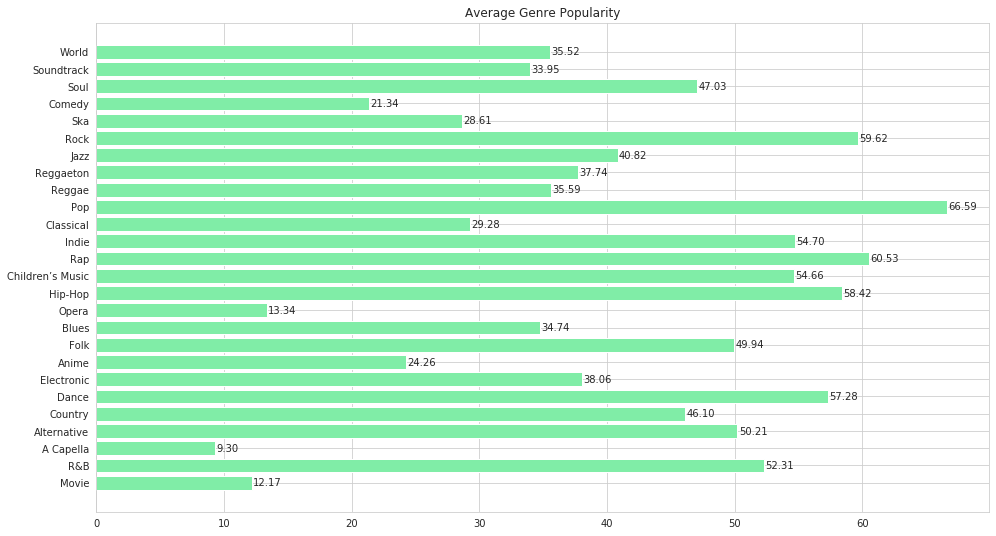

In [372]:
fig = plt.figure(figsize = (16,9))
ax = plt.axes()
plt.barh(y=avg_pop.index,width=avg_pop['Average Popularity'], color='#80eda7')
plt.title('Average Genre Popularity')
for a in pops:
    plt.text(pops[a]+0.1,a,str('%.2f'%(pops[a])),va='center')
fig.savefig('a.png',dpi=300)

Hasan Minhaj once said in his episode about hiphop on [Patriot Act](https://youtu.be/MEZV6EE8JMA?t=296) that shorter tracks are streamed a lot more. I wanted to test this statement. So we'll use the popularity measure and compare it to the track length. The track length is in milliseconds, however,and hence are converted to minutes by dividing by 1000 and then by 60.

In [ ]:
popdur = tracks[['popularity','duration_ms']]
popdur['duration_ms'] = popdur['duration_ms'].div(1000*60)

In [374]:
popdur.columns = ['popularity','duration_min']

In [375]:
hists,bin_edges = np.histogram(popdur['duration_min'],10)

Let's see how the track length is distributed.

Text(0.5, 0, 'Track Duration (minutes)')

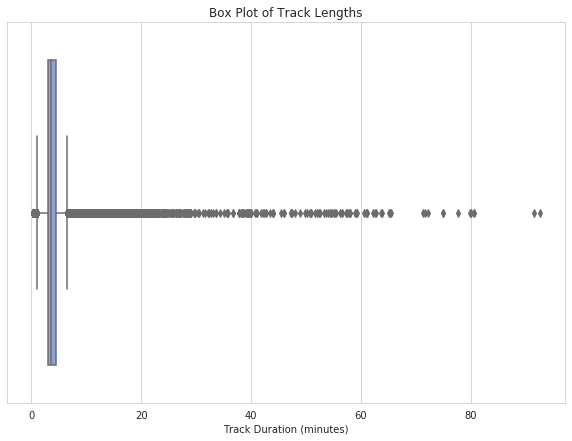

In [376]:
fig2 = plt.figure(figsize=(10,7))
ax = plt.axes()
bxplt = sb.boxplot(popdur['duration_min'],color='#819be6')
plt.title('Box Plot of Track Lengths')
plt.xlabel('Track Duration (minutes)')

There are multiple outliers, which skews the plot a lot. We will hide these outliers and plot them again. Since this plot was generated using Seaborn, we set the ```showfliers``` to ```False```.

Text(0.5, 0, 'Track Duration (minutes)')

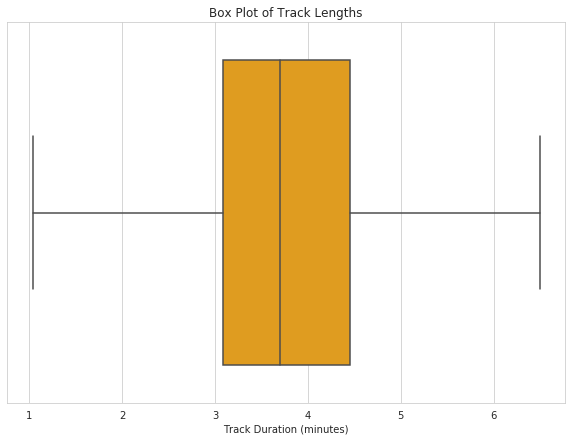

In [377]:
sb.set_style('whitegrid')
fig2 = plt.figure(figsize=(10,7))
ax = plt.axes()
bxplt = sb.boxplot(popdur['duration_min'], showfliers=False, color='orange')
plt.title('Box Plot of Track Lengths')
plt.xlabel('Track Duration (minutes)')

It is necessary to drop the outliers to prevent long tails from showing up in the plot, and thus stretching it. We will calculate the Z-Scores for the song durations, drop songs with Z-Scores more than 2 positive standard deviations away from the mean.

In [378]:
from scipy import stats

In [ ]:
popdur['z_score'] = stats.zscore(popdur['duration_min'])

The cell above was used to calculate Z-Scores, the cell below used to drop those tracks.

In [380]:
popdur = popdur[popdur['z_score']<2]

Now, let's make a scatter plot of the duration vs. popularity.

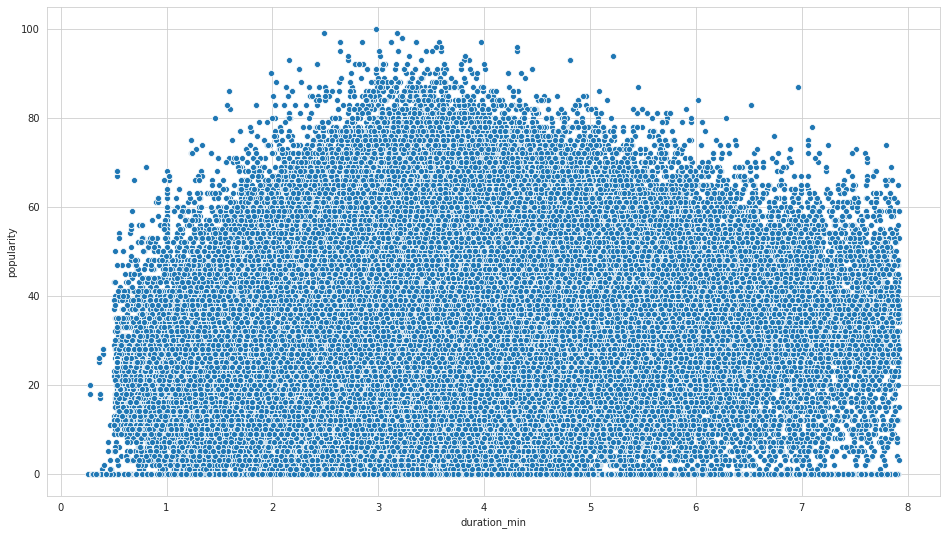

In [381]:
fig2 = plt.figure(2,figsize=(16,9))
sctr = sb.scatterplot(x=popdur['duration_min'],y=popdur['popularity'])

Well this data is too messy and crowded to make sense of. We need to find a better way to understand it. Interestingly though, we do notice a trend here; that songs closer to 3 minutes are often the most popular. <br>

We will use the previously-used box plots again. We noticed that the songs close to 3 minutes seem to be most popular, so we will classify songs into 4 categories, `Short`,for songs lower than 2 min. `Med`, for songs between 2 and 4 minutes, `Longish`, for songs between 4 to 6 minutes, and `Long` for songs longer than 6 minutes. This category variable column is added to the `popdur` dataframe.

In [382]:
length_cat = []
for i in popdur['duration_min']:
    if i <=2:
        length_cat.append('Short')
    elif i<=4:
        length_cat.append('Med')
    elif i<=6:
        length_cat.append('Longish')
    else:
        length_cat.append('Long')

In [383]:
popdur['length_category'] = length_cat

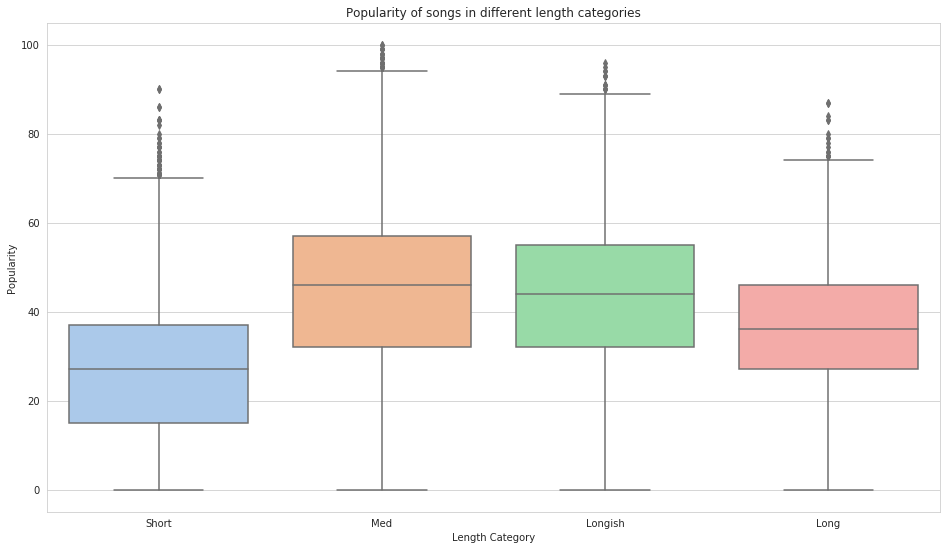

In [385]:
fig = plt.figure(figsize=(16,9))
bxplt = sb.boxplot(y=popdur['popularity'],x=popdur['length_category'],palette=sb.color_palette('pastel'))
plt.title('Popularity of songs in different length categories')
plt.xlabel('Length Category')
plt.ylabel('Popularity')
fig.savefig('b.png',dpi=300)

So far, it looks like Hasan Minhaj may not have got his facts right. <br>
TODO:
<ul>
    <li>Find the popular genre in each category</li>
    <li>Make waffle chart for the category genres</li>
</ul>